# Phenotypic Sensitivity to Parametric Changes

© 2018 Griffin Chure. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT).

--- 

In [6]:
import sys
sys.path.insert(0, '../../')
import numpy as np
import pandas as pd
import sympy
import bokeh.io
import bokeh.plotting
import mut.thermo
bokeh.io.output_notebook()
sympy.init_printing()

Loading BokehJS ...

In this notebook, we examine the general relationship between phenotypic properties and their parametric changes,

$$
{\partial \text{phenotype} \over \partial \text{parameter}} \tag{1}.
$$

We've looked at the sensitivity of the fold-change (phenotype) depends on the 


In [18]:
# Define variables. 
delta_ep = sympy.Symbol(r'\Delta\Delta\varepsilon_{RA}')
F = sympy.Symbol(r'F')
F_ref = sympy.Symbol(r'F_{r}')
F_per = sympy.Symbol(r'F_{p}')
epAI_wt = sympy.Symbol(r'\Delta\varepsilon_{AI}^{(wt)}')
epAI_mut = sympy.Symbol(r'\Delta\varepsilon_{AI}^{(mut)}')
c = sympy.Symbol(r'c')
ka_wt = sympy.Symbol(r'K_A^{(wt)}')
ki_wt = sympy.Symbol(r'K_I^{(wt)}')
ka_mut = sympy.Symbol(r'K_A^{(mut)}')
ki_mut = sympy.Symbol(r'K_I^{(mut)}')
r_nns = sympy.Symbol(r'{R \over N_{NS}}')
pact_wt = ((1 + c / ka_wt)**2 / ((1 + c / ka_wt)**2 + sympy.exp(epAI_mut) * (1 + c / ki_wt)**2))
pact_mut = ((1 + c / ka_mut)**2 / ((1 + c / ka_mut)**2 + sympy.exp(epAI_mut) * (1 + c / ki_mut)**2))
log_pact = sympy.log(pact_wt / pact_mut)
deltaF = log_pact - delta_ep
diffc = sympy.diff(deltaF, c)

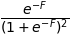

In [13]:
sympy.diff((1 / (1 + sympy.exp(-F))), F)

In [16]:
F_range = np.linspace(-8, 8, 500)

fig = bokeh.plotting.figure(x_axis_label='Bohr parameter [kT]',
                           y_axis_label='d fc / dF')

fig.line(F_range, np.exp(-F_range) / (1 + np.exp(-F_range))**2)
bokeh.io.show(fig)


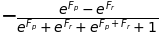

In [23]:
fc_ref = (1 + sympy.exp(-F_ref))**-1
fc_per = (1 + sympy.exp(-F_per))**-1
sympy.simplify(fc_ref - fc_per)